### Import Libraries Needed

In [83]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/jerichols/MLTerapan/main/BBRI.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-11-10,95.452896,99.998276,86.362144,88.634834,43.729198,5658651738
1,2003-11-11,88.634834,90.907516,86.362144,90.907516,44.850441,3232466332
2,2003-11-12,88.634834,95.452896,88.634834,95.452896,47.092972,2203244555
3,2003-11-13,95.452896,95.452896,93.180206,95.452896,47.092972,1309077610
4,2003-11-14,95.452896,95.452896,90.907516,95.452896,47.092972,1897824280
...,...,...,...,...,...,...,...
5129,2024-07-26,4760.000000,4810.000000,4740.000000,4760.000000,4760.000000,192267300
5130,2024-07-29,4800.000000,4800.000000,4760.000000,4780.000000,4780.000000,126109900
5131,2024-07-30,4720.000000,4740.000000,4670.000000,4670.000000,4670.000000,201835700
5132,2024-07-31,4650.000000,4710.000000,4650.000000,4670.000000,4670.000000,168490300


In [85]:
# Set Date as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [86]:
df.info() #Check data type and count

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5134 entries, 2003-11-10 to 2024-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5134 non-null   float64
 1   High       5134 non-null   float64
 2   Low        5134 non-null   float64
 3   Close      5134 non-null   float64
 4   Adj Close  5134 non-null   float64
 5   Volume     5134 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 280.8 KB


In [87]:
df.isnull().sum() #Checking if there is null value in the data

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [88]:
df.describe() # Checking more detailed about the data to see if there is any "unclean" data

,Open,High,Low,Close,Adj Close,Volume
count,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5.134000e+03
mean,2032.215271,2054.885514,2007.840738,2031.287072,1622.707928,1.746030e+08
std,1584.665738,1599.212320,1569.118685,1583.280043,1482.409988,1.598940e+08
min,88.634834,90.907516,86.362144,88.634834,43.729198,0.000000e+00
25%,587.489853,595.444275,572.717407,581.808105,348.850586,9.513864e+07
50%,1704.515991,1727.242920,1681.789185,1706.788696,1161.419189,1.395883e+08
75%,3299.943115,3327.215332,3254.489258,3290.852295,2565.654297,2.113438e+08
max,6350.000000,6450.000000,6350.000000,6400.000000,6300.000000,5.658652e+09


### Plotting Relationship

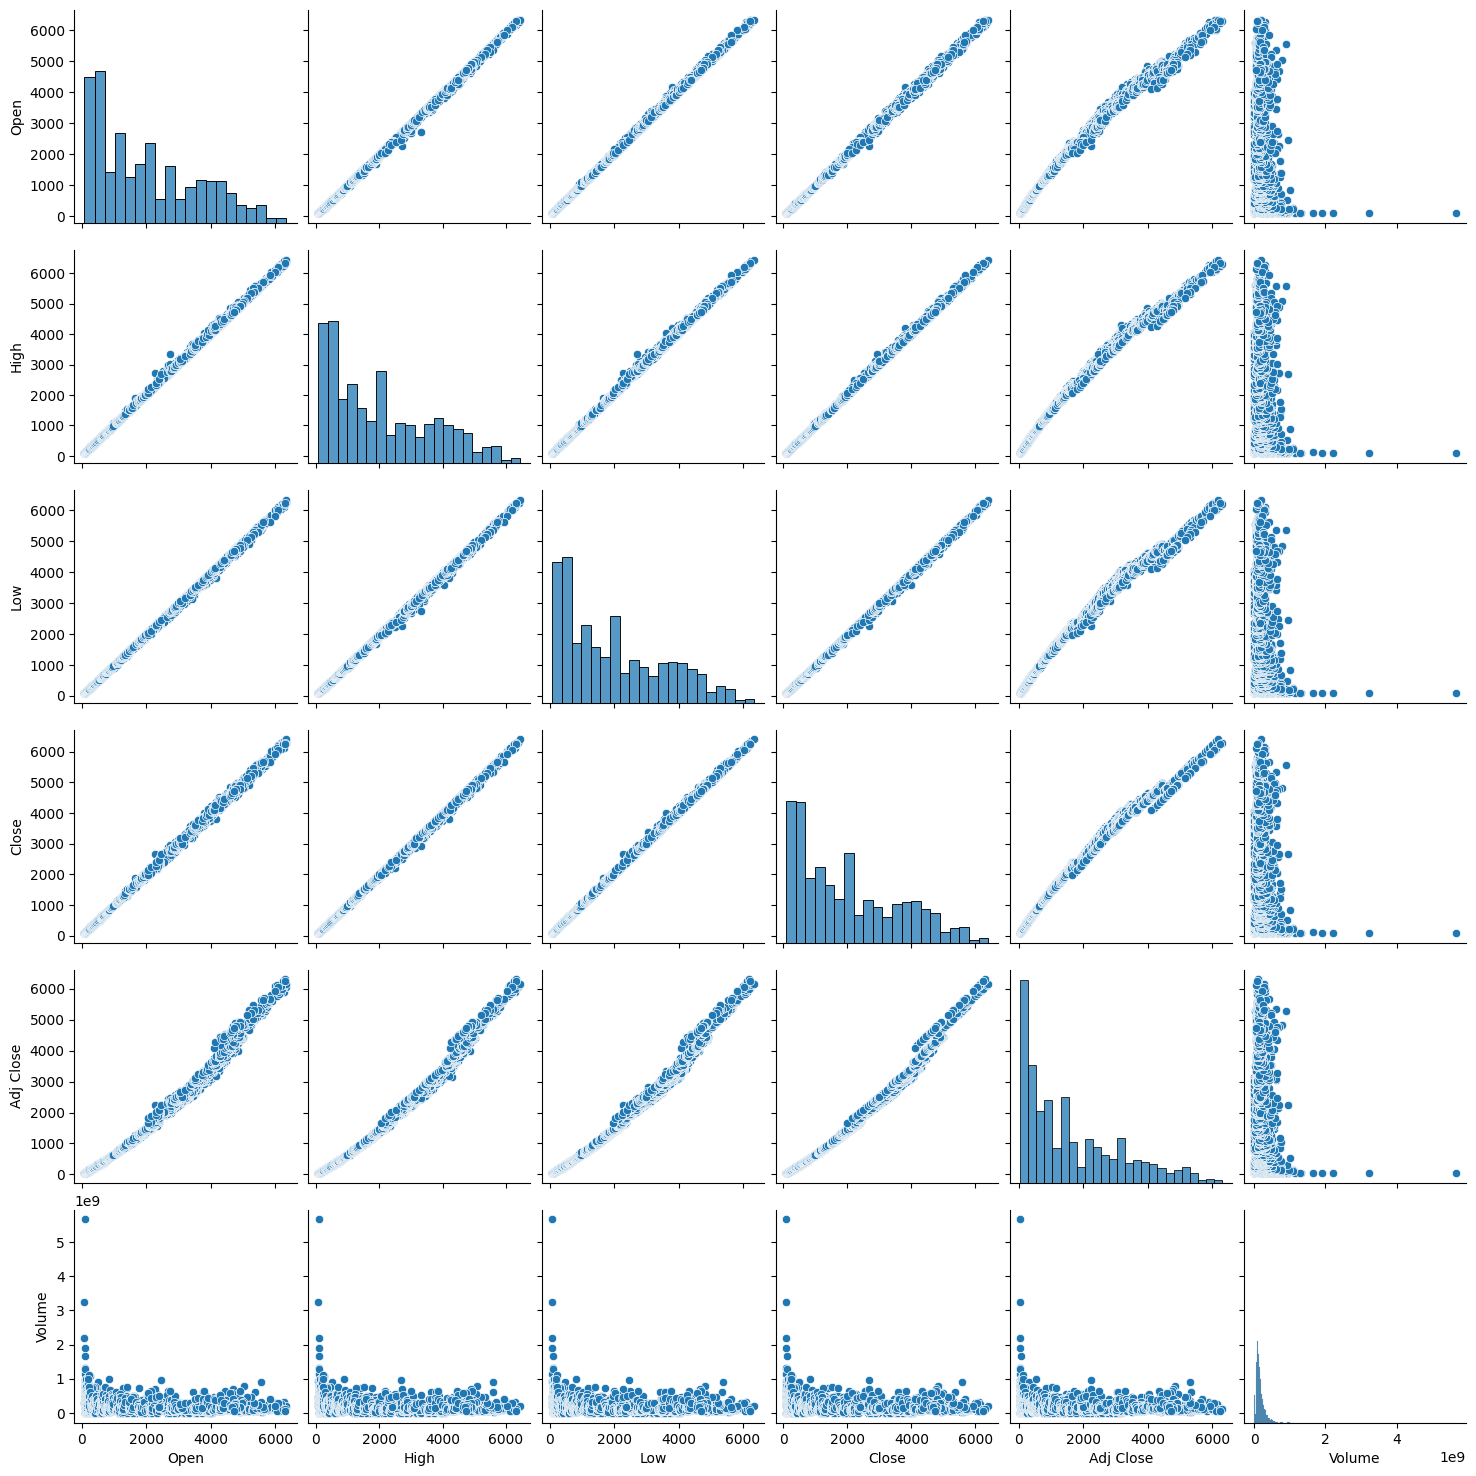

In [89]:
sns.pairplot(df)

In [90]:
corr_matrix = df.select_dtypes(include='number').corr()
print("\nMatriks Korelasi:")
print(corr_matrix)

# Check the correlation between column


Matriks Korelasi:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999824  0.999838  0.999674   0.992138 -0.139711
High       0.999824  1.000000  0.999776  0.999833   0.992397 -0.135765
Low        0.999838  0.999776  1.000000  0.999844   0.992293 -0.142579
Close      0.999674  0.999833  0.999844  1.000000   0.992411 -0.139096
Adj Close  0.992138  0.992397  0.992293  0.992411   1.000000 -0.116711
Volume    -0.139711 -0.135765 -0.142579 -0.139096  -0.116711  1.000000


### Checking Outlier

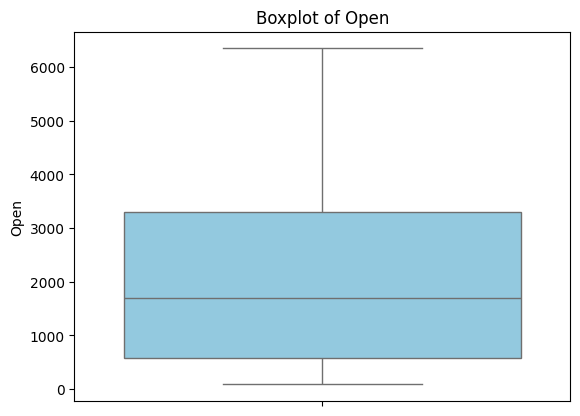

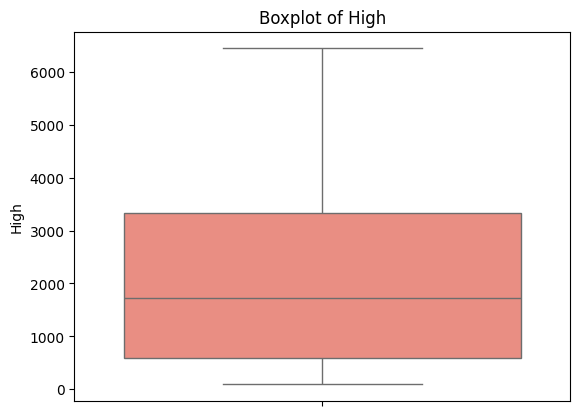

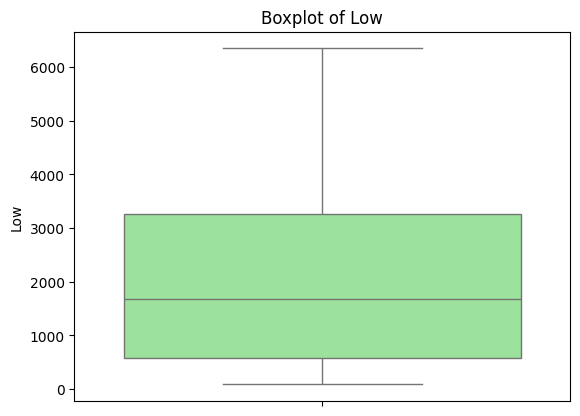

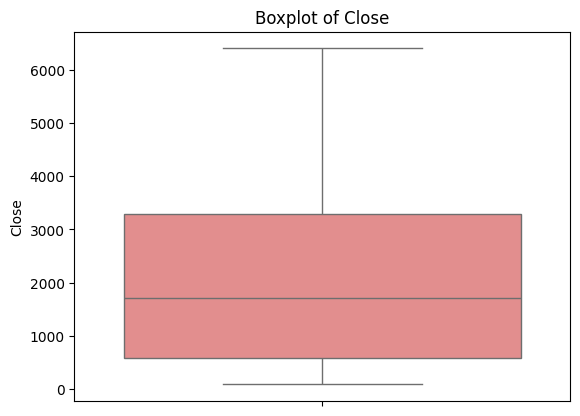

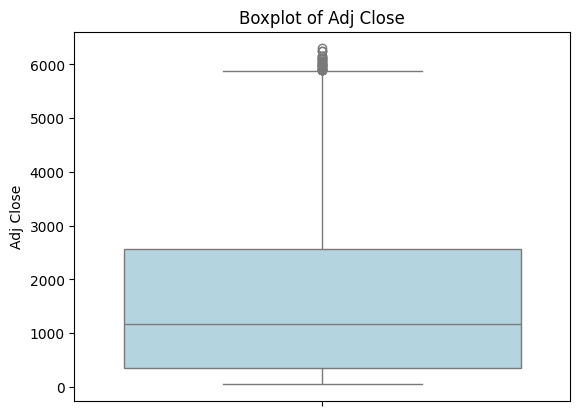

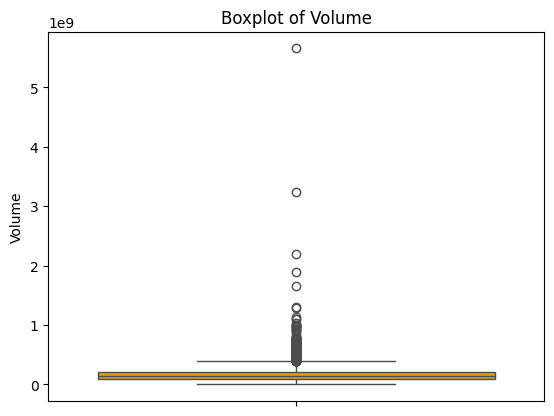

In [91]:
sns.boxplot(y="Open", data=df, color="skyblue")
plt.title('Boxplot of Open')
plt.show()

sns.boxplot(y="High", data=df, color="salmon")
plt.title('Boxplot of High')
plt.show()

sns.boxplot(y="Low", data=df, color="lightgreen")
plt.title('Boxplot of Low')
plt.show()

sns.boxplot(y="Close", data=df, color="lightcoral")
plt.title('Boxplot of Close')
plt.show()

sns.boxplot(y="Adj Close", data=df, color="lightblue")
plt.title('Boxplot of Adj Close')
plt.show()

sns.boxplot(y="Volume", data=df, color="orange")
plt.title('Boxplot of Volume')
plt.show()

In [92]:
# Function to calculate outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identify outliers for 'Adj Close'
adj_close_outliers, adj_close_lower, adj_close_upper = identify_outliers(df, 'Adj Close')
print(f"Adj Close - Lower Bound: {adj_close_lower}, Upper Bound: {adj_close_upper}")
print(f"Number of outliers in 'Adj Close': {len(adj_close_outliers)}")

# Identify outliers for 'Volume'
volume_outliers, volume_lower, volume_upper = identify_outliers(df, 'Volume')
print(f"Volume - Lower Bound: {volume_lower}, Upper Bound: {volume_upper}")
print(f"Number of outliers in 'Volume': {len(volume_outliers)}")

Adj Close - Lower Bound: -2976.3549805, Upper Bound: 5890.8598635
Number of outliers in 'Adj Close': 28
Volume - Lower Bound: -79169095.625, Upper Bound: 385651521.375
Number of outliers in 'Volume': 307


As you can see there is some outlier in Adj Close and Volume, i chose to remove the outlier because its a small sample that it doesnt effect much of the data.

In [93]:
# Remove outliers for 'Adj Close'
df_cleaned_adj_close = df[(df['Adj Close'] >= adj_close_lower) & (df['Adj Close'] <= adj_close_upper)]

# Remove outliers for 'Volume'
df_cleaned = df_cleaned_adj_close[(df_cleaned_adj_close['Volume'] >= volume_lower) & (df_cleaned_adj_close['Volume'] <= volume_upper)]

print(f"Original DataFrame Size: {df.shape}")
print(f"Cleaned DataFrame Size: {df_cleaned.shape}")

Original DataFrame Size: (5134, 6)
Cleaned DataFrame Size: (4799, 6)


In [94]:
df_cleaned.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4.799000e+03
mean,2056.998285,2078.275559,2032.971337,2055.352984,1635.143567,1.488027e+08
std,1556.208803,1569.533190,1541.069355,1554.361794,1448.400333,8.003610e+07
min,88.634834,90.907516,88.634834,90.907516,44.850441,0.000000e+00
25%,631.807282,643.170715,618.171143,627.261902,379.492264,9.198090e+07
50%,1809.059692,1831.786499,1790.878174,1809.059692,1265.417603,1.336786e+08
75%,3327.215332,3345.396729,3281.761475,3322.669922,2586.916504,1.931680e+08
max,6125.000000,6175.000000,6075.000000,6100.000000,5876.015625,3.855446e+08


### Data Preprocessing

#### Spliting the data into training and testing

In [95]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'

# Split the data into features (X) and target (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Size: {X_train.shape}, Testing Data Size: {X_test.shape}")


Training Data Size: (3839, 5), Testing Data Size: (960, 5)


In [96]:
    print(f'Total # of sample in whole dataset: {len(X)}')
    print(f'Total # of sample in train dataset: {len(X_train)}')
    print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 4799
Total # of sample in train dataset: 3839
Total # of sample in test dataset: 960


#### Standartization training Data

In [97]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the entire DataFrame
scaler.fit(X_train)

# Transform the entire DataFrame
X_train_scaled = scaler.transform(X_train)

# Convert the scaled NumPy array back to DataFrame, maintaining column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index = X_train.index)

# Display the scaled DataFrame
print(X_train_scaled.head())

                Open      High       Low  Adj Close    Volume
Date                                                         
2022-03-24  0.753991  0.768814  0.760122   0.722747  0.535014
2006-10-20  0.059487  0.059133  0.059092   0.035843  0.248053
2014-01-20  0.233806  0.235777  0.234460   0.166975  0.190336
2007-01-12  0.060240  0.060263  0.053754   0.036737  0.732591
2023-04-10  0.790437  0.790358  0.793671   0.789902  0.152737


### Models

In [98]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],  columns=[ 'RandomForest', 'Boosting'])

#### Random Forest

In [99]:
    # Impor library yang dibutuhkan
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error

    # buat model prediksi
    RF = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=55, n_jobs=-1)
    RF.fit(X_train_scaled, y_train)


    models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train_scaled), y_true=y_train)

#### Boost Algorithm



#### Hyperparameter Tuning

In [100]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the XGBoost regressor
boosting = xgb.XGBRegressor(
    learning_rate=0.08,
    n_estimators=200,
    max_depth=4,
    random_state=55
)
# Fit the model
boosting.fit(X_train_scaled, y_train)

# Predict and evaluate
y_train_pred = boosting.predict(X_train_scaled)
train_mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)

# Update the models DataFrame
models.loc['train_mse', 'XGBoost'] = train_mse

### Evaluasi Model

In [101]:
# Scale the Test Data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,  index=X_test.index)

In [102]:
mse = pd.DataFrame(columns=['train', 'test'], index=['RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = { 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train_scaled))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_scaled))/1e3

# Panggil mse
mse

,train,test
RF,0.188381,0.366601
Boosting,0.261435,0.449671


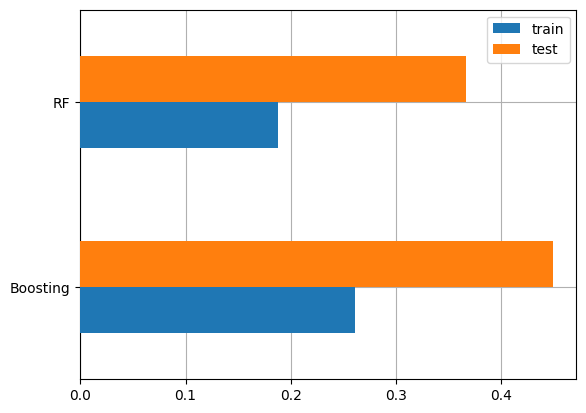

In [103]:
    #Plotting the evaluation
    fig, ax = plt.subplots()
    mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
    ax.grid(zorder=0)

In [104]:
  #Make a prediction based on the data
  prediksi = X_test_scaled.iloc[:1].copy()
  pred_dict = {'y_true':y_test[:1]}
  for name, model in model_dict.items():
      pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

  pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_Boosting
Date,,,
2020-03-03,3727.208252,3730.5,3736.899902


As we can see random forest algorithm perform better the XGBoost

#### Plot the prediction

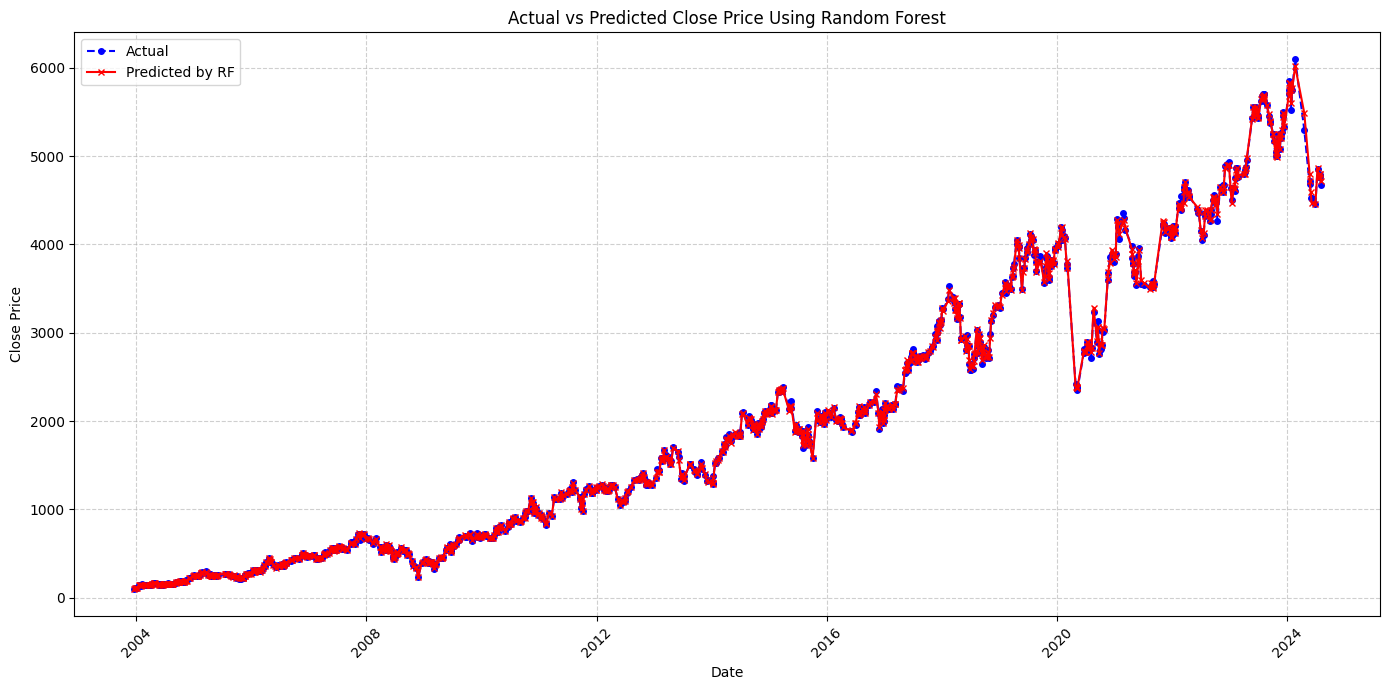

In [105]:
# Make predictions on the test set
y_test_pred_rf = RF.predict(X_test_scaled)

# Create a DataFrame for plotting with the dates from the test set
plot_df = pd.DataFrame({
    'Date': df_cleaned.loc[X_test.index].index,  # Access dates from index
    'Actual': y_test.values,
    'Predicted_RF': y_test_pred_rf
})

# Sort the DataFrame by date
plot_df.sort_values(by='Date', inplace=True)

# Plotting the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual', color='blue', linestyle='--', marker='o', markersize=4)
plt.plot(plot_df['Date'], plot_df['Predicted_RF'], label='Predicted by RF', color='red', linestyle='-', marker='x', markersize=4)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price Using Random Forest')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()